<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Exploratory_Data_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

Exercises from DataCamp
solved by me

## Read, clean, validate

**Exploring DataFrame**

* Calculate the number of rows and columns in the DataFrame nsfg.
```
improt pandas as pd
# Display the number of rows and columns
nsfg.shape
```
```
nsfg.shape
(9358, 10)
```

* Display the names of the columns in nsfg.

```
# Display the names of the columns
nsfg.columns
```

```
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth', 'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'], dtype='object')
```

* Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.

```
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']
```

* Display the first 5 elements of ounces.

```
# Print the first 5 elements of ounces
print(ounces.head())
```

```
<script.py> output:
    0     4.0
    1    12.0
    2     4.0
    3     NaN
    4    13.0
    Name: birthwgt_oz1, dtype: float64
```




##Clean and Validate

**Validate a variable**

* How many pregnancies in this dataset ended with a live birth?


value	label
1	Live birth
2	Induced abortion
3	Stillbirth
4	Miscarriage
5	Ectopic pregnancy
6	Current pregnancy

```
In [4]:
birth = nsfg['outcome']
In [5]:
birth.value_counts().sort_index()
Out[5]:

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64
```

> 6489

**Cleaning a variable**

* In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
* Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.

```
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())
```

```
<script.py> output:
    1.0    6379
    2.0     100
    3.0       5
    Name: nbrnaliv, dtype: int64
```

**Compute a variable**

* Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.

```
# Select the columns and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100
```

* Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.

```
# Compute the difference
preg_length = agepreg-agecon
```

* Use .describe() to compute the mean duration and other summary statistics.

```
# Compute summary statistics
print(preg_length.describe())
```

```
count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64
```




### Filter and visualize

**Make a histogram**

* Plot a histogram of agecon with 20 bins.

```
# Plot the histogram
plt.hist(agecon.dropna(), bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()
```

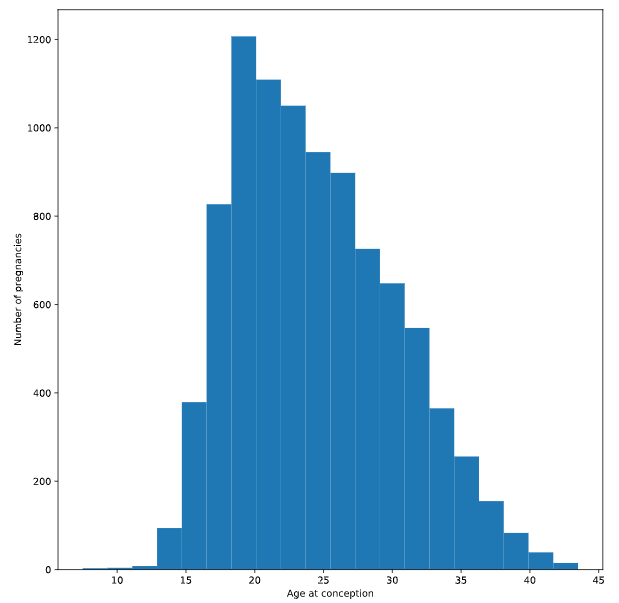


* Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

```
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()
```

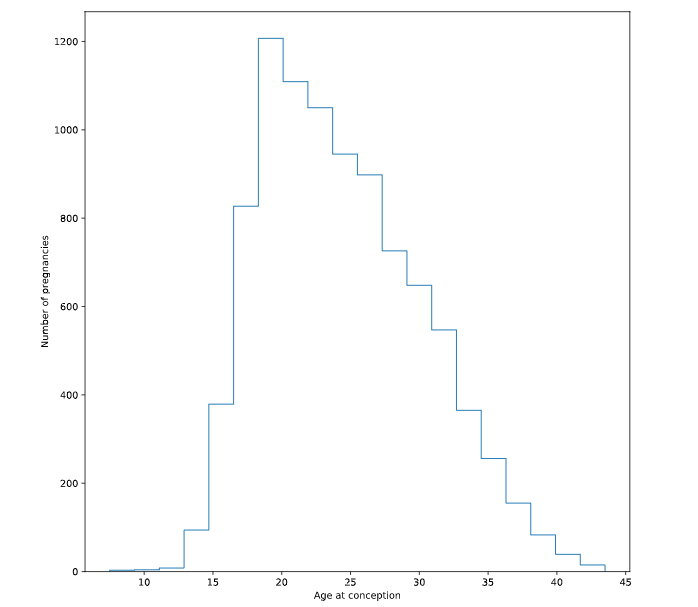

**Compute birth weight**

* Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
* Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
* Compute the mean weight of full-term babies.

```
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth']>=37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term] 

# Compute the mean weight of full-term babies
print(full_term_weight.mean())
```

**Filter**

* Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
*For comparison, select multiple, full-term babies and compute their mean birth weight.

```
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())
```

```
Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222
```



## Distributions

**Make a PMF**

*[Probability Mass Function]('https://pypi.org/project/empiricaldist/')


* Make a PMF for year with normalize=False and display the result.

```
# Compute the PMF for year
pmf_year = Pmf(gss['year'], normalize=False)

# Print the result
print(pmf_year)
```

```
1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: Pmf, dtype: int64
```
**Plot a PMF**

* Select the 'age' column from the gss DataFrame and store the result in age.

```
# Select the age column
age = gss['age']
```

* Make a normalized PMF of age. Store the result in pmf_age.
```
# Make a PMF of age
pmf_age = Pmf(age)
```
* Plot pmf_age as a bar chart.
```
# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()
```
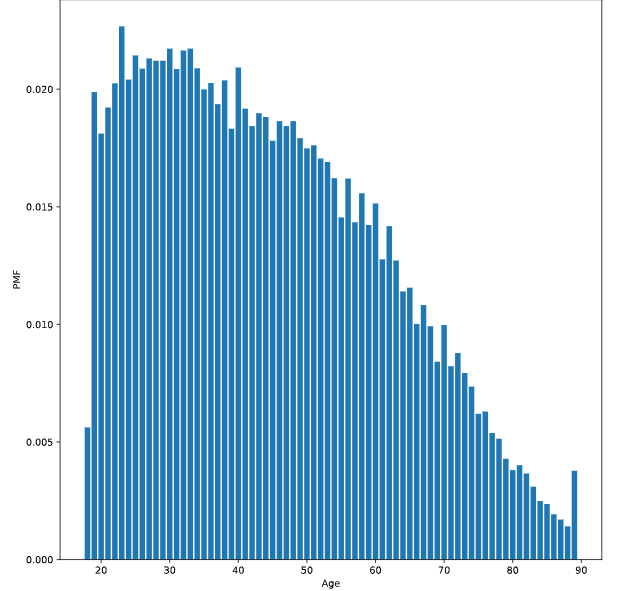

### Cumulative distribution functions
*[CDF]('https://pypi.org/project/empiricaldist/')

**Make a CDF**

```
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))
```
```
<script.py> output:
    0.2539137136526388
```

* What fraction of the respondents in the GSS dataset are OLDER than 30?
>
Approximately 75%

**Compute IQR**

```
 # Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)
```
```
<script.py> output:
    29676.0
```

**Plot a CDF**

* Select 'realinc' from the gss dataset.
* Make a Cdf object called cdf_income.
* Create a plot of cdf_income using .plot().

```


